In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Final_data.csv'
df = pd.read_csv(file_path)

In [3]:
# Show basic info
print("Total rows:", len(df))
df.head()

Total rows: 8985


,Unnamed: 0,week_of_outbreak,state_ut,district,Disease,Cases,Deaths,day,mon,year,Latitude,Longitude,preci,LAI,Temp
0,0,1st week,Meghalaya,East Jaintia Hills,Acute Diarrhoeal Disease,160,NaN,2,1,2022,25.251576,92.484050,0.020354,34.5,291.533333
1,1,2nd week,Maharashtra,Gadchiroli,Malaria,7,2.0,10,1,2022,19.759070,80.162281,0.007479,9.0,299.970000
2,2,3rd week,Tamil Nadu,Pudukottai,Acute Diarrhoeal Disease,8,NaN,18,1,2022,10.382651,78.819126,0.107413,12.0,300.766667
3,3,3rd week,Gujarat,Patan,Acute Diarrhoeal Disease,7,NaN,11,1,2022,23.774057,71.683735,0.065094,9.0,299.080000
4,4,3rd week,Kerala,Ernakulam,Acute Diarrhoeal Disease,14,NaN,24,12,2021,9.984080,76.274146,0.041256,33.0,303.028000


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling1D,  Conv1D, BatchNormalization, Dropout, Bidirectional, LSTM, Dense

In [5]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [6]:
df.shape

(8985, 15)

In [7]:
# remove extra  spaces in all columns
df.columns = df.columns.str.strip()

In [8]:
df.columns

Index(['Unnamed: 0', 'week_of_outbreak', 'state_ut', 'district', 'Disease',
       'Cases', 'Deaths', 'day', 'mon', 'year', 'Latitude', 'Longitude',
       'preci', 'LAI', 'Temp'],
      dtype='object')

In [9]:
# checking the number of missing values
print(df.isnull().sum())

Unnamed: 0             0
week_of_outbreak       0
state_ut               0
district               0
Disease                0
Cases                  0
Deaths              6431
day                    0
mon                    0
year                   0
Latitude               0
Longitude              0
preci                136
LAI                 2195
Temp                 938
dtype: int64


In [10]:
df = df.drop(columns=["week_of_outbreak", "state_ut", "district","Deaths", "Cases"])

In [11]:
print("Total rows:", len(df))
df.head()

Total rows: 8985


,Unnamed: 0,Disease,day,mon,year,Latitude,Longitude,preci,LAI,Temp
0,0,Acute Diarrhoeal Disease,2,1,2022,25.251576,92.484050,0.020354,34.5,291.533333
1,1,Malaria,10,1,2022,19.759070,80.162281,0.007479,9.0,299.970000
2,2,Acute Diarrhoeal Disease,18,1,2022,10.382651,78.819126,0.107413,12.0,300.766667
3,3,Acute Diarrhoeal Disease,11,1,2022,23.774057,71.683735,0.065094,9.0,299.080000
4,4,Acute Diarrhoeal Disease,24,12,2021,9.984080,76.274146,0.041256,33.0,303.028000


In [12]:
# handle missing values
df["preci"] = df["preci"].fillna(df["preci"].mode()[0])
df["LAI"] = df["LAI"].fillna(df["LAI"].median())
df['Temp'] = df['Temp'].fillna(df['Temp'].median())

In [13]:
# checking the number of missing values
print(df.isnull().sum())

Unnamed: 0    0
Disease       0
day           0
mon           0
year          0
Latitude      0
Longitude     0
preci         0
LAI           0
Temp          0
dtype: int64


In [14]:
df["Disease"].unique()

array(['Acute Diarrhoeal Disease', 'Malaria',
       'Acute Encephalitis Syndrome', 'Acute Gastroenteritis', 'Dengue',
       'pyrexia of unknown origin', 'Chikungunya', 'Cholera',
       'Malaria (PV)', 'Dengue Fever', 'Suspected Dengue',
       'Dengue Chikungunya', 'Dengue And Chikungunya',
       'Suspected Cholera', 'Diarrhea', 'Suspected Chikungunya',
       'Suspected Dengue And Chikungunya', 'Gastroenteritis',
       'Dengue And Malaria', 'Dengue/Chikungunya', 'Chikungunya/Dengue',
       'Chikungunya/ Dengue'], dtype=object)

In [15]:
# Convert all disease names to lowercase for easier matching
df["Disease"] = df["Disease"].str.lower()

# I create a binary column: 1 if 'dengue' is mentioned, 0 otherwise
df["Disease"] = df["Disease"].apply(lambda x: 1 if "dengue" in x else 0)

In [16]:
df.head()

,Unnamed: 0,Disease,day,mon,year,Latitude,Longitude,preci,LAI,Temp
0,0,0,2,1,2022,25.251576,92.484050,0.020354,34.5,291.533333
1,1,0,10,1,2022,19.759070,80.162281,0.007479,9.0,299.970000
2,2,0,18,1,2022,10.382651,78.819126,0.107413,12.0,300.766667
3,3,0,11,1,2022,23.774057,71.683735,0.065094,9.0,299.080000
4,4,0,24,12,2021,9.984080,76.274146,0.041256,33.0,303.028000


In [17]:
df["Disease"].unique()

array([0, 1])

In [18]:
df.shape

(8985, 10)

In [19]:
print(df["Disease"].value_counts())

Disease
0    7287
1    1698
Name: count, dtype: int64


In [20]:
df.describe()

,Unnamed: 0,Disease,day,mon,year,Latitude,Longitude,preci,LAI,Temp
count,8985.000000,8985.000000,8985.000000,8985.000000,8985.000000,8985.000000,8985.000000,8985.000000,8985.000000,8985.000000
mean,4492.000000,0.188982,15.423150,6.985865,2014.655426,20.623102,80.113904,0.462798,10.441235,304.407354
std,2593.890418,0.391516,8.871505,2.687808,3.354520,5.873265,5.698627,0.623899,6.933728,6.613825
min,0.000000,0.000000,1.000000,1.000000,2009.000000,8.079252,68.968002,0.000002,0.000000,259.680000
25%,2246.000000,0.000000,8.000000,5.000000,2012.000000,16.291519,75.919568,0.025045,6.000000,300.925000
50%,4492.000000,0.000000,15.000000,7.000000,2015.000000,21.347763,78.133725,0.236744,9.000000,303.445000
75%,6738.000000,0.000000,23.000000,9.000000,2017.000000,24.796436,84.550268,0.665474,12.000000,307.860000
max,8984.000000,1.000000,31.000000,12.000000,2022.000000,34.611024,95.945234,5.680000,62.000000,327.728000


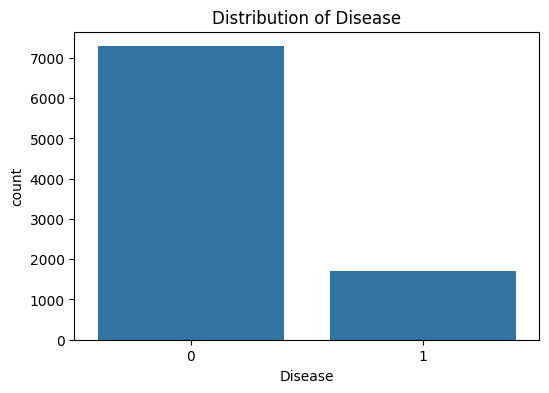

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Disease", data=df)
plt.title("Distribution of Disease")
plt.show()

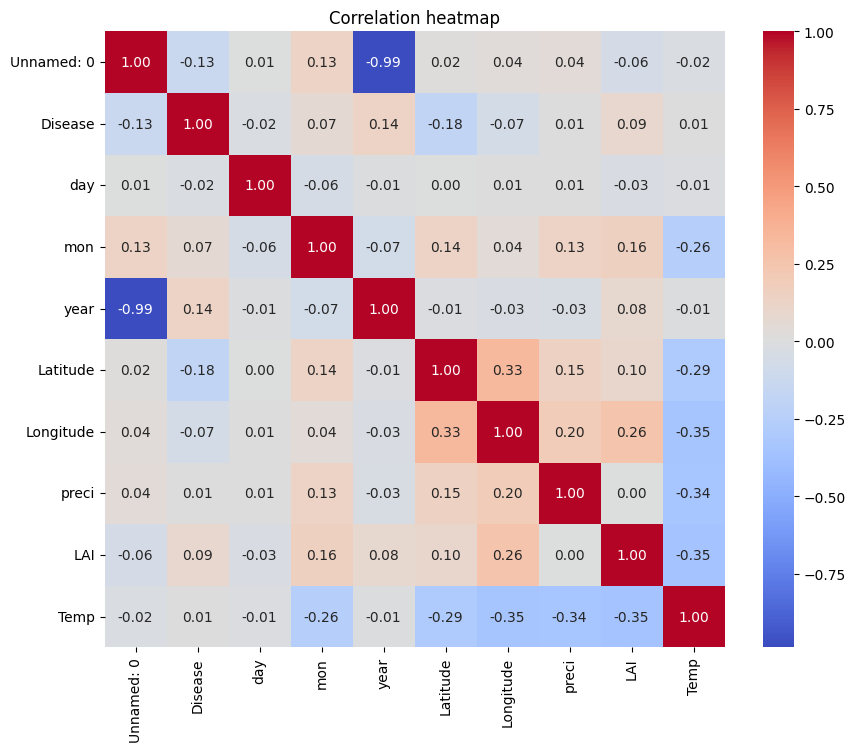

In [22]:
# correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

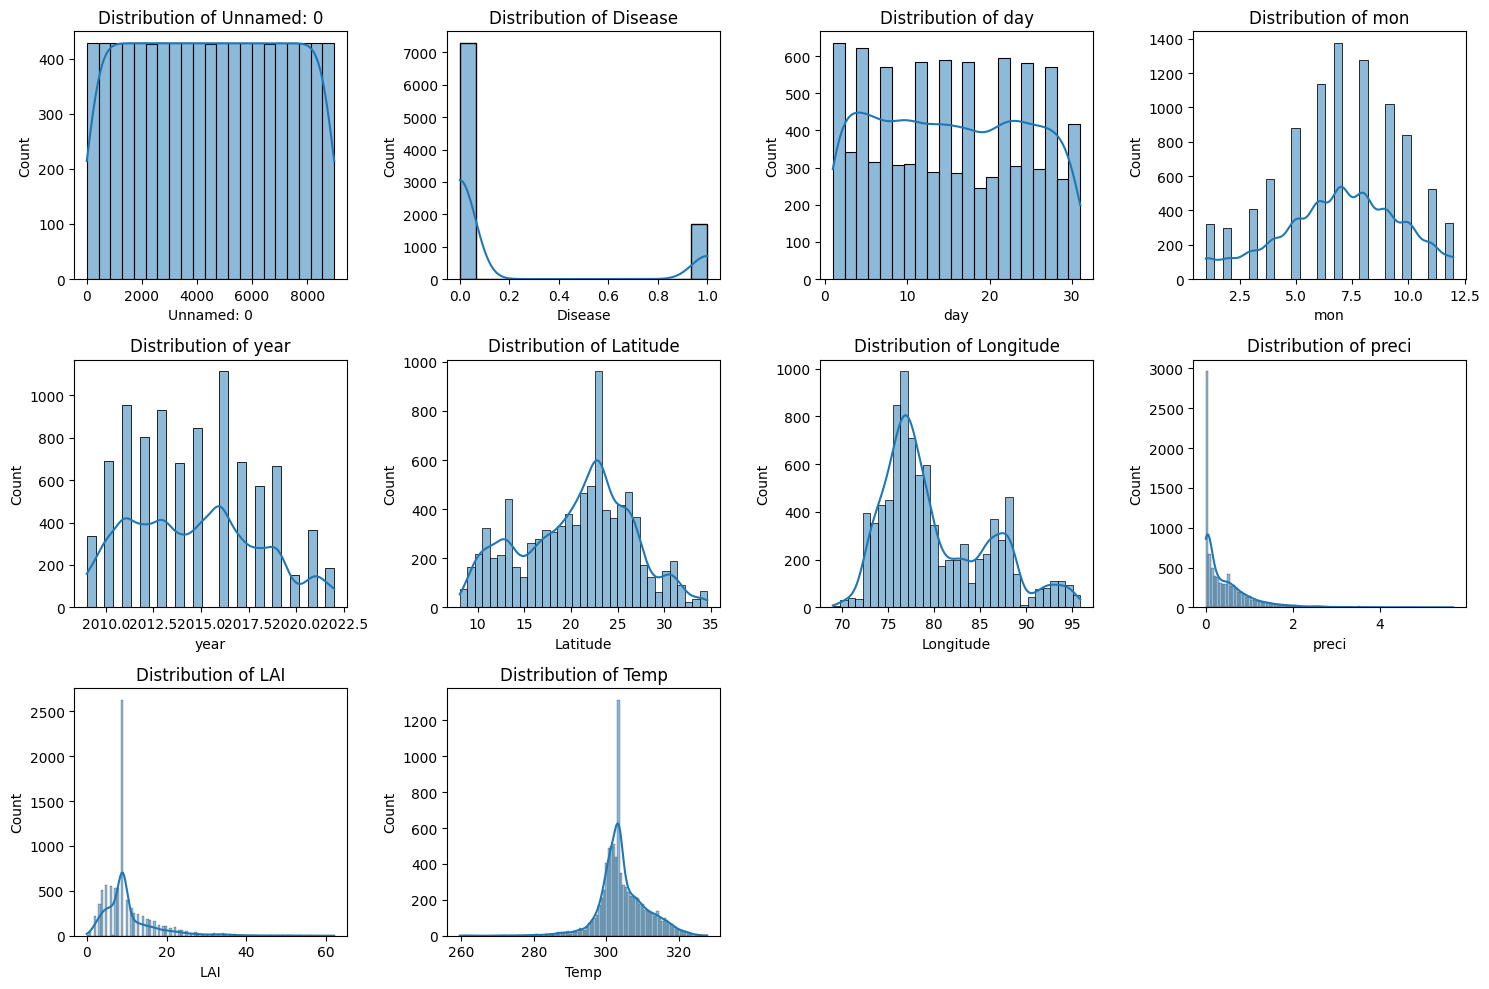

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Correct column names
columns_to_plot = ['Unnamed: 0', 'Disease', 'day', 'mon', 'year', 'Latitude', 'Longitude', 'preci', 'LAI', 'Temp']

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

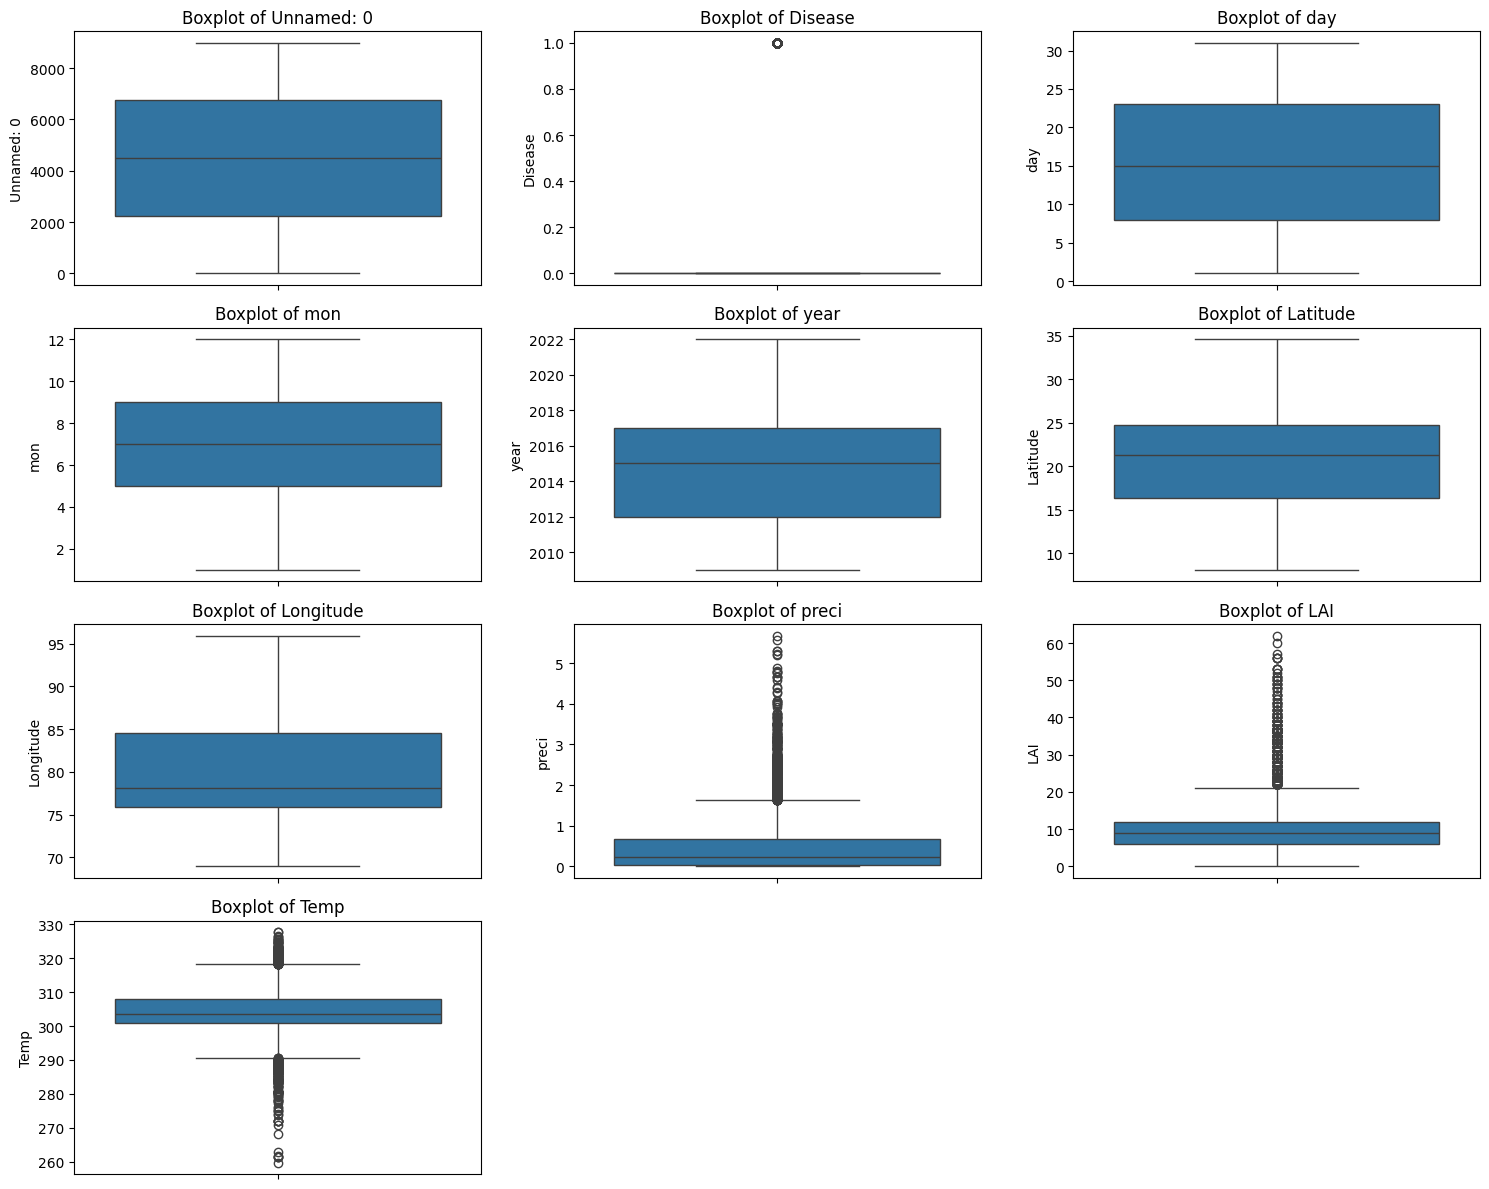

In [24]:
plt.figure(figsize=(15, 12))

for i, column in enumerate(['Unnamed: 0', 'Disease', 'day', 'mon', 'year', 'Latitude', 'Longitude', 'preci', 'LAI', 'Temp'], 1):
    plt.subplot(4, 3, i)  # Changed to 4x3 grid to support up to 12 plots
    sns.boxplot(y=df[column])  # best practice: specify y= to avoid warnings
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()


In [25]:
# drop highly correlated column
df = df.drop(columns=['Unnamed: 0'])

In [26]:
print(df['Disease'].value_counts())

Disease
0    7287
1    1698
Name: count, dtype: int64


In [27]:
df.head()

,Disease,day,mon,year,Latitude,Longitude,preci,LAI,Temp
0,0,2,1,2022,25.251576,92.484050,0.020354,34.5,291.533333
1,0,10,1,2022,19.759070,80.162281,0.007479,9.0,299.970000
2,0,18,1,2022,10.382651,78.819126,0.107413,12.0,300.766667
3,0,11,1,2022,23.774057,71.683735,0.065094,9.0,299.080000
4,0,24,12,2021,9.984080,76.274146,0.041256,33.0,303.028000


In [28]:
# separate majority and minority class
df_majority = df[df["Disease"] == 0]
df_minority = df[df["Disease"] == 1]

In [29]:
print(df_majority.shape)
print(df_minority.shape)

(7287, 9)
(1698, 9)


In [30]:
# downsample majority class to match minority count
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

In [31]:
df_majority_downsampled.shape

(1698, 9)

In [32]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [33]:
df_downsampled.shape

(3396, 9)

In [34]:
df_downsampled.head()

,Disease,day,mon,year,Latitude,Longitude,preci,LAI,Temp
5770,0,8,8,2013,23.329188,86.367238,0.380612,4.0,301.280000
968,0,25,7,2019,28.787228,77.098090,0.874836,7.0,306.640000
8028,0,4,4,2010,16.213991,81.025728,0.000686,11.0,305.532000
1390,0,18,12,2017,18.351591,76.755424,0.000077,9.0,305.656667
4475,0,23,10,2015,22.359913,87.413314,0.040064,9.0,302.952000


In [35]:
# shuffle the final dataframe
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [36]:
df_downsampled.head()

,Disease,day,mon,year,Latitude,Longitude,preci,LAI,Temp
0,0,4,12,2011,18.492809,73.138071,0.040083,14.0,304.840000
1,1,25,10,2013,18.492809,73.138071,0.014567,21.0,302.696667
2,1,13,6,2018,16.702841,74.240533,1.336497,6.0,299.660000
3,0,6,2,2021,31.338096,76.761163,0.227997,12.0,287.772000
4,0,6,12,2009,28.416667,79.383333,0.000074,6.0,294.883333


In [37]:
df_downsampled["Disease"].value_counts()

,count
Disease,
0,1698
1,1698


In [38]:

# Create new x and new y combinely
X = df_downsampled.drop(columns='Disease').copy()
Y = df_downsampled['Disease'].copy()

# Varify two shape is same or not
print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (3396, 8)
Y shape: (3396,)


In [39]:
print(X)

      day  mon  year   Latitude  Longitude     preci   LAI        Temp
0       4   12  2011  18.492809  73.138071  0.040083  14.0  304.840000
1      25   10  2013  18.492809  73.138071  0.014567  21.0  302.696667
2      13    6  2018  16.702841  74.240533  1.336497   6.0  299.660000
3       6    2  2021  31.338096  76.761163  0.227997  12.0  287.772000
4       6   12  2009  28.416667  79.383333  0.000074   6.0  294.883333
...   ...  ...   ...        ...        ...       ...   ...         ...
3391    6    8  2009  28.533642  76.689815  0.008672  10.0  308.548000
3392   22    9  2015  20.011247  73.790236  1.461112   9.0  297.346667
3393   21   10  2021  12.794811  79.000641  0.546810  17.0  303.285000
3394   23    9  2019  18.492809  73.138071  1.857139  19.0  298.570000
3395    4   10  2012  20.718175  70.932383  0.506582   9.0  303.445000

[3396 rows x 8 columns]


In [40]:
print(Y)

0       0
1       1
2       1
3       0
4       0
       ..
3391    0
3392    0
3393    0
3394    0
3395    1
Name: Disease, Length: 3396, dtype: int64


In [41]:
from sklearn.model_selection import train_test_split

# 70% train, 30% temp
X_train, X_temp, Y_train, Y_temp = train_test_split(
    X, Y, test_size=0.30, stratify=Y, random_state=2)

# 50%-50% temp → val/test
X_val, X_test, Y_val, Y_test = train_test_split(
    X_temp, Y_temp, test_size=0.5, stratify=Y_temp, random_state=2)

In [42]:
print(X.shape, X_train.shape, X_val.shape, X_test.shape)

(3396, 8) (2377, 8) (509, 8) (510, 8)


In [43]:
import numpy as np
print("Y_train:", np.unique(Y_train, return_counts=True))
print("Y_test:", np.unique(Y_test, return_counts=True))
print("Y_val:", np.unique(Y_val, return_counts=True))

Y_train: (array([0, 1]), array([1188, 1189]))
Y_test: (array([0, 1]), array([255, 255]))
Y_val: (array([0, 1]), array([255, 254]))


In [44]:
print(X)

      day  mon  year   Latitude  Longitude     preci   LAI        Temp
0       4   12  2011  18.492809  73.138071  0.040083  14.0  304.840000
1      25   10  2013  18.492809  73.138071  0.014567  21.0  302.696667
2      13    6  2018  16.702841  74.240533  1.336497   6.0  299.660000
3       6    2  2021  31.338096  76.761163  0.227997  12.0  287.772000
4       6   12  2009  28.416667  79.383333  0.000074   6.0  294.883333
...   ...  ...   ...        ...        ...       ...   ...         ...
3391    6    8  2009  28.533642  76.689815  0.008672  10.0  308.548000
3392   22    9  2015  20.011247  73.790236  1.461112   9.0  297.346667
3393   21   10  2021  12.794811  79.000641  0.546810  17.0  303.285000
3394   23    9  2019  18.492809  73.138071  1.857139  19.0  298.570000
3395    4   10  2012  20.718175  70.932383  0.506582   9.0  303.445000

[3396 rows x 8 columns]


In [45]:
print(Y)

0       0
1       1
2       1
3       0
4       0
       ..
3391    0
3392    0
3393    0
3394    0
3395    1
Name: Disease, Length: 3396, dtype: int64


In [46]:
# The Model
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
#from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.svm import SVC

base_models = [
    ('mlp1', MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=500, early_stopping=True, random_state=42)),
    ('mlp2', MLPClassifier(hidden_layer_sizes=(256, 128, 64), max_iter=500, early_stopping=True, random_state=42)),
    ('mlp3', MLPClassifier(hidden_layer_sizes=(512, 256, 128), max_iter=300, early_stopping=True, random_state=42)),

    #('xgb', XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=4, use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('lgbm1', LGBMClassifier(n_estimators=1000, learning_rate=0.03, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42)),

    # ('xgb', XGBClassifier(...)),  # You can uncomment this line if needed
    # ('cat', CatBoostClassifier(...)),  # Uncomment if using CatBoost
   ('svc', SVC(probability=True, kernel='rbf', C=2.0, gamma='scale', random_state=42)),
]

# Meta-classifier
meta_model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)




# Stacking model
ensemble_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,

    cv=5,
    n_jobs=-1,
    passthrough=True
)

# Fit
ensemble_model.fit(X_train, Y_train.ravel())

/tmp/ipython-input-46-2142378964.py:41: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  ensemble_model.fit(X_train, Y_train.ravel())
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(cv=5,
                   estimators=[('mlp1',
                                MLPClassifier(early_stopping=True,
                                              hidden_layer_sizes=(150, 100, 50),
                                              max_iter=500, random_state=42)),
                               ('mlp2',
                                MLPClassifier(early_stopping=True,
                                              hidden_layer_sizes=(256, 128, 64),
                                              max_iter=500, random_state=42)),
                               ('mlp3',
                                MLPClassifier(early_stopping=True,
                                              hidden_layer_sizes=(512, 256,
                                                                  128),
                                              max_iter=300, random_state=42)),
                               ('lgbm1',
                                LGBMClassifier(colsample_bytree=0.8,
                                               learning_rate=0.03, max_depth=6,
                                               n_estimators=1000,
                                               random_state=42,
                                               subsample=0.8)),
                               ('svc',
                                SVC(C=2.0, probability=True, random_state=42))],
                   final_estimator=LogisticRegression(max_iter=1000,
                                                      random_state=42),
                   n_jobs=-1, passthrough=True)

In [47]:
from sklearn.metrics import accuracy_score

# Make predictions
y_train_pred = ensemble_model.predict(X_train)
y_val_pred = ensemble_model.predict(X_val)
y_test_pred = ensemble_model.predict(X_test)

# Accuracy
print("Train Accuracy:", accuracy_score(Y_train, y_train_pred))
print("Validation Accuracy:", accuracy_score(Y_val, y_val_pred))
print("Test Accuracy:", accuracy_score(Y_test, y_test_pred))

Train Accuracy: 0.9772822885990745
Validation Accuracy: 0.7406679764243614
Test Accuracy: 0.7862745098039216


/tmp/ipython-input-48-3771309770.py:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  true_labels = Y_test.ravel()  # flatten if necessary


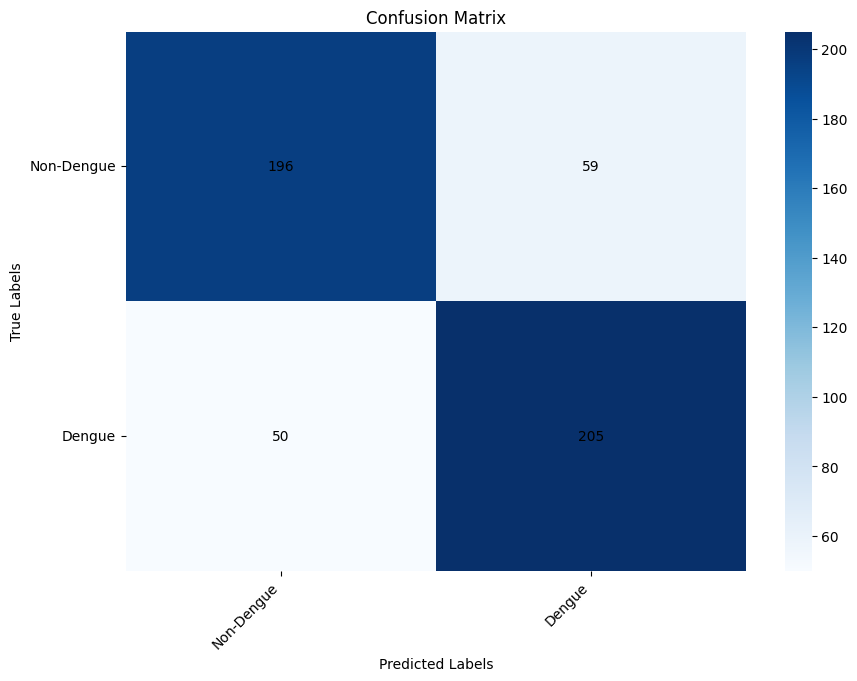

In [48]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict on test set using your ensemble_model (sklearn)
y_test_pred = ensemble_model.predict(X_test)

# True labels
true_labels = Y_test.ravel()  # flatten if necessary

# Class names for labels (adjust if you have different names)
class_names = ['Non-Dengue', 'Dengue']  # or ['Parasitized', 'Uninfected'] if your classes are like that

# Compute confusion matrix
cm = confusion_matrix(true_labels, y_test_pred)

# Plot heatmap
plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(cm, cmap="Blues", xticklabels=class_names, yticklabels=class_names, annot=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

# Add counts in the center of each cell
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        heatmap.text(j + 0.5, i + 0.5, cm[i, j],
                     ha="center", va="center", color="black")

plt.show()


In [49]:
from sklearn.metrics import classification_report

# True labels
true_labels = Y_test.ravel()

# Predicted labels from your ensemble model
predicted_classes = ensemble_model.predict(X_test)

# Class names
class_names = ['Non-Dengue', 'Dengue']

# Generate classification report
report = classification_report(true_labels, predicted_classes, target_names=class_names)
print(report)


/tmp/ipython-input-49-3326255496.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  true_labels = Y_test.ravel()


              precision    recall  f1-score   support

  Non-Dengue       0.80      0.77      0.78       255
      Dengue       0.78      0.80      0.79       255

    accuracy                           0.79       510
   macro avg       0.79      0.79      0.79       510
weighted avg       0.79      0.79      0.79       510



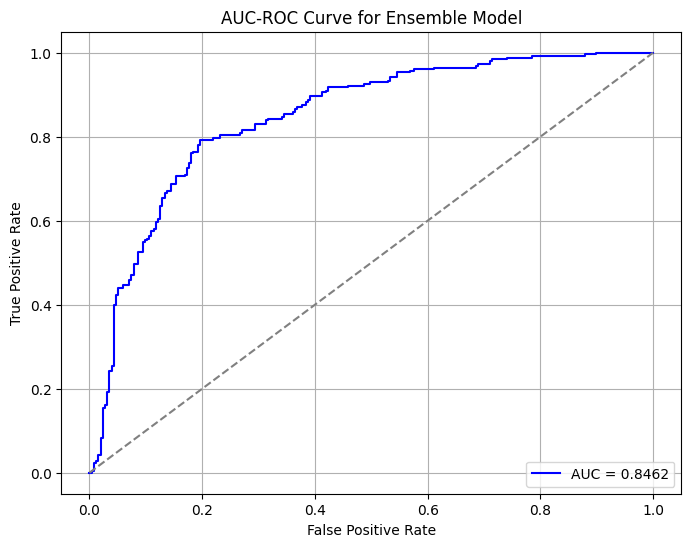

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for test data using your ensemble_model
y_pred = ensemble_model.predict_proba(X_test)[:, 1]  # get probabilities for positive class

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for Ensemble Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
